The Heat Map with Time is an interactive visualization that shows concentration of data over the time and, different from normal heat maps, this kind does not present relation between variables. It could also be an alternative for bar or line charts where it is wanted to express the gradual changes over the time.

In this case I am using the NYC traffic accidents dataset in order to show in which time of the day there is higher occurrence of incidents. The dataset can be found at https://www.kaggle.com/datasets/mysarahmadbhat/nyc-traffic-accidents


In [1]:
import pandas as pd

nyc = pd.read_csv('NYC_Accidents_2020.csv')
nyc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [2]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [3]:
#checking duplicates:
dup = nyc[nyc.duplicated()]
print("Number of duplicate rows:", dup.shape)

Number of duplicate rows: (0, 29)


In [4]:
#because we only need crash date and time and latitude and longitude, delete other columns: 
ny = nyc.iloc[:, 0:6]
ny.drop(columns=['BOROUGH', 'ZIP CODE'], inplace=True, axis=1)
ny.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE
0,2020-08-29,15:40:00,40.89210,-73.833760
1,2020-08-29,21:00:00,40.69050,-73.919914
2,2020-08-29,18:20:00,40.81650,-73.946556
3,2020-08-29,00:00:00,40.82472,-73.892960
4,2020-08-29,17:10:00,40.64989,-73.933890


In [5]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRASH DATE  74881 non-null  object 
 1   CRASH TIME  74881 non-null  object 
 2   LATITUDE    68935 non-null  float64
 3   LONGITUDE   68935 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [6]:
#dropping null values:
ny.dropna(axis=0, inplace=True)

#NOTE: the visualization does not work if there are missing values into the data.

In [7]:
#use folium library to plot the map of NYC:
#!pip install folium
import folium

In [8]:
#preparing the data to apply the heat map:

#sort df by hour to check the time where the accidents happen the most:
ny.sort_values('CRASH TIME', ascending=True, inplace=True)

#creating a column from CRASH DATE + CRASH TIME:
ny['RecordedAtTime'] = ny['CRASH DATE'] + " " + ny['CRASH TIME']

#converting column to datetime
ny['RecordedAtTime']=pd.to_datetime(ny['RecordedAtTime'])

#creating hour column
ny['hour']=ny['RecordedAtTime'].apply(lambda x: x.hour+1)

#verify if the changes were applied:
ny.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,RecordedAtTime,hour
27011,2020-05-25,00:00:00,40.825060,-73.90396,2020-05-25,1
23059,2020-06-11,00:00:00,40.847908,-73.88837,2020-06-11,1
58915,2020-02-04,00:00:00,40.743156,-73.97213,2020-02-04,1
69809,2020-01-13,00:00:00,40.787224,-73.95417,2020-01-13,1
69803,2020-01-13,00:00:00,40.612390,-74.13296,2020-01-13,1


In [9]:
#verify data types:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68935 entries, 27011 to 25816
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CRASH DATE      68935 non-null  object        
 1   CRASH TIME      68935 non-null  object        
 2   LATITUDE        68935 non-null  float64       
 3   LONGITUDE       68935 non-null  float64       
 4   RecordedAtTime  68935 non-null  datetime64[ns]
 5   hour            68935 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [10]:
#check if the 'hour' is listed as 1-24 and then use it as index in the map:
time_index = list(ny['hour'].sort_values().astype('str').unique())
time_index

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [11]:
#create a list where each row will be latitude+longitude, grouped by 'hour':
location = []
for _, d in ny.groupby('hour'):
    location.append([[row['LATITUDE'], row['LONGITUDE']] for _, row in d.iterrows()])

In [ ]:
#create the map and then add the time animation:
from folium.plugins import HeatMapWithTime

heatmap = folium.Map(location=[40.72861, -73.88721],
               tiles='cartodbpositron', #there's also the option of 'stamentoner', but I prefer 'cartodbpositron' for being a cleaner map;
               zoom_start=10, #best position to see the changes by time without the need to adjust the zoom for this data;
               control_scale=True)

HeatMapWithTime(location,
                index=time_index,
                auto_play=True,
                use_local_extrema=True
               ).add_to(heatmap)

heatmap

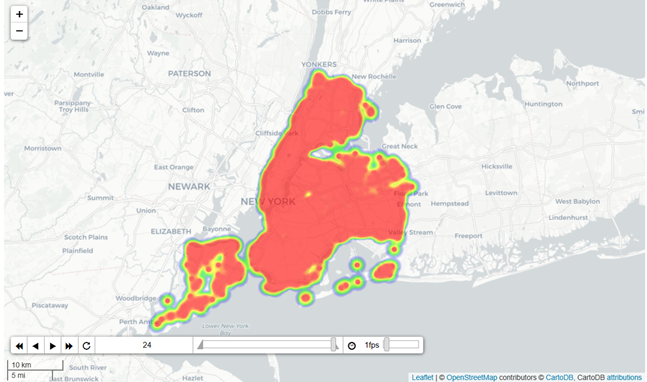